In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# create the inspector and connect to the engine
inspector = inspect(engine)

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
measurement = Base.classes.keys()[0]

In [9]:
print(Base)

<class 'sqlalchemy.ext.automap.Base'>


In [10]:
inspect(engine).get_table_names()

['measurement', 'station']

In [11]:
# Save references to each table
measurement = Base.classes.measurement

In [12]:
station = Base.classes.keys()[1]

In [13]:
inspect(engine).get_columns(station)

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [14]:
type(station)

str

In [15]:
station = Base.classes.station

In [16]:
# Create our session (link) from Python to the DB
session = Session(engine)
session

# Exploratory Precipitation Analysis

In [17]:
# Find the first date in the data set.
session.query(measurement.date).order_by(measurement.date).first()

('2010-01-01',)

In [18]:
# Find the number of dates in the data set.
session.query(func.count(measurement.date)).all()

[(19550,)]

In [19]:
# Find the most recent date in the data set.
session.query(func.max(measurement.date)).all()

[('2017-08-23',)]

In [20]:
# Calculate the date one year from the last date in data set.
qdate = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", qdate)

Query Date:  2016-08-23


In [21]:
p_data = session.query(measurement.date,measurement.prcp).filter(measurement.date >= qdate).all()

In [22]:
p_data_df = pd.DataFrame(p_data , columns=['date','prcp'])
p_data_df

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [23]:
p_data_df = p_data_df.sort_values('date')
p_data_df

,date,prcp
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


Text(0.5, 1.0, 'Precipitation for last year')

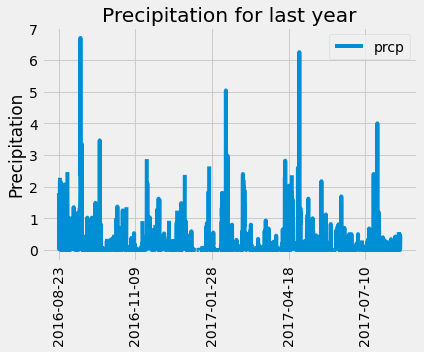

In [24]:
p_data_df.plot(x= 'date' , y='prcp', rot=90)
plt.xlabel('')
plt.ylabel('Precipitation')
plt.title('Precipitation for last year')

In [25]:
p_data_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [26]:
query = """
        SELECT 
        date, 
        prcp  
        FROM 
        measurement
        WHERE
        date BETWEEN '2016-08-23' AND '2017-08-23'
        ORDER BY
        date desc;
        """
pd.read_sql(query, engine)

,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
...,...,...
2225,2016-08-23,0.05
2226,2016-08-23,NaN
2227,2016-08-23,0.02
2228,2016-08-23,1.79


In [36]:
# from flask import Flask, jsonify
# results = session.execute(query).all()
# df = pd.DataFrame(results, columns=['Date','PRCP']).to_json()
# df

In [ ]:
engine.execute('Select * From measurement Limit 5').fetchall()

In [ ]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

In [ ]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
qdate = dt.date(2017, 8, 23) - dt.timedelta(days=365)
p_data = session.query(measurement.date,measurement.prcp).filter(measurement.date >= qdate).all()
p_data_df = p_data_df.sort_values('date')
p_data_df.plot(x= 'date' , y='prcp', rot=90)
plt.xlabel('')
plt.ylabel('Precipitation')
plt.title('Precipitation for last year')

# Starting from the most recent data point in the database. 
session.query(measurement.date).order_by(measurement.date).first()

# Save the query results as a Pandas DataFrame and set the index to the date column
measurement = Base.classes.measurement
station = Base.classes.station
p_data_df = pd.DataFrame(p_data , columns=['date','prcp'])
p_data_df
# Sort the dataframe by date
p_data_df = p_data_df.sort_values('date')
p_data_df

# Use Pandas Plotting with Matplotlib to plot the data
p_data_df.plot(x= 'date' , y='prcp', rot=90)
plt.xlabel('')
plt.ylabel('Precipitation')
plt.title('Precipitation for last year')



In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data
p_data_df.describe()

# Exploratory Station Analysis

In [31]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(station.id)).all()

[(9,)]

In [32]:
query = """
        SELECT
            station.station,
            count(measurement.id) as station_cnts
        FROM
            measurement
            JOIN station on measurement.station = station.station
        GROUP BY
            station.station
        ORDER BY
            station_cnts desc;
        """
df = pd.read_sql(query, engine)
df    

,station,station_cnts
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [34]:
session.execute("SELECT station From station").all()

[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [35]:
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [ ]:
query = session.query(measurement.tobs, measurement.date).filter(measurement.station == 'USC00519281').filter(measurement.date >= '2016-08-23').all()
df2 = pd.DataFrame(query, columns=['temperatures','date'])
df2



In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df2["temperatures"],bins=12, label='annual',color='b')
plt.ylabel('Frequency',size=15)
plt.xlabel('Temperature', size=15)
plt.title("Histogram")
plt.show()

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
query = """
        SELECT
            station.station,
            count(measurement.id) as station_cnts
        FROM
            measurement
            JOIN station on measurement.station = station.station
        GROUP BY
            station.station
        ORDER BY
            station_cnts desc;
        """
df = pd.read_sql(query, engine)
df    

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.figure(figsize=(10,6))
plt.hist(df2["temperatures"],bins=12, label='annual',color='b')
plt.ylabel('Frequency',size=15)
plt.xlabel('Temperature', size=15)
plt.title("Histogram")
plt.show()

# Close session

In [ ]:
# Close Session
session.close()